In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [71]:


# Define categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['number']).columns

# Handle "unknown" values by replacing them with the mode
for col in categorical_features:
    mode_val = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_val)

# Address 'pdays'
df['pdays_contacted'] = (df['pdays'] != 999).astype(int)
df['pdays'] = df['pdays'].replace(999, 0)

# Outlier handling (capping at 99th percentile)
age_cap = df['age'].quantile(0.99)
df['age'] = df['age'].where(df['age'] <= age_cap, age_cap)

campaign_cap = df['campaign'].quantile(0.99)
df['campaign'] = df['campaign'].where(df['campaign'] <= campaign_cap, campaign_cap)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features[:-1], drop_first=True)  # drop_first=True to avoid multicollinearity

# Encode the target variable 'y'
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # stratify to maintain class balance

# Create and train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)  # Use 'liblinear' for smaller datasets
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC


--- Model Evaluation ---
Accuracy: 89.76%
Precision: 66.40%
Recall: 19.95%
F1-Score: 30.68%
ROC AUC: 78.60%


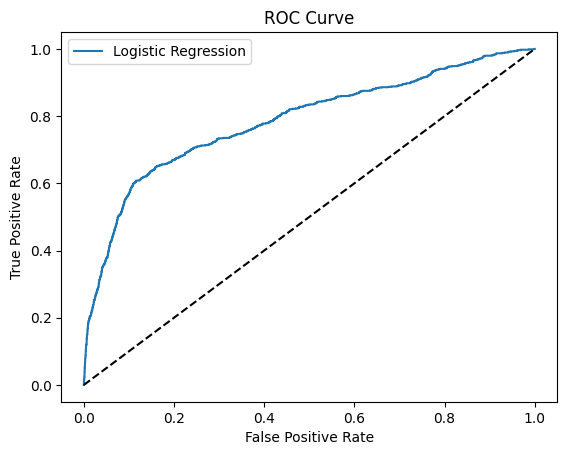

In [77]:

# Evaluate predictions
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred) * 100:.2f}%")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba) * 100:.2f}%")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()